# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Jugando con tensores</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## Contenido

  * [Introducción](#Introducción)
  * [Tensor](#Tensor)
  * [Rango](#Rango)
  * [Redes Neuronales](#Redes-Neuronales)
  * [Producto tensorial](#Producto-tensorial)
  * [Explicación del producto](#Explicación-del-producto)
  * [Las Imagenes a color](#Las-Imagenes-a-color)
  * [Construcción aleatoria de una imagen](#Construcción-aleatoria-de-una-imagen)
  * [Imagen real](#Imagen-real)
  * [Planos de color](#Planos-de-color)
  * [Manipulación de imágenes](#Manipulación-de-imágenes)
  * [Colocar dos imagenes en un tensor](#Colocar-dos-imagenes-en-un-tensor)
  * [Transformaciones afines](#Trasformaciones-afines)
  

## Introducción

En esta lección aprenderemos los conceptos básicos de tensores y como los usamos manipular imágenes usando tensores.

## Tensor

Un tensor es un concepto matemático que generaliza los conceptos de escalares, vectores y matrices.

![Tensores](https://miro.medium.com/max/700/1*V83L4ydCdk21tXjP22VjXQ.jpeg)

En terminos muy simples, un tensor es un objeto dinámico (*matemáticamente diríamos que es una función entre espacios vectoriales*) que vive dentro de una estrutura. 

Pero no vamos a hacer un tratado matemático aquí. 

Lo importante en esta clase es entender que en realidad, escalares, vectores, matrices pueden verse como tensores fijos y eso será sufiente para lo que sigue.

## Rango

Diremos que los escalares tienen rango (shape) 0, los vectores tiene rango 1, las matrices rango y el tensor de la derecha rango 3. 

El rango correponde al número de índices que se requiere para identificar de manera uńica a cada elemento del tensor. 

Observe que por ejemplo, en el último tensor, requiere (fila, columna, cajón). 

También podría ser (cajón, fila, columna).

## Redes Neuronales 

La siguiente imagen muestra el estado en un instante de una una parte oculta de una red  neuronal profunda.

![Fragmento oculto de una red neuronal](https://miro.medium.com/max/496/1*GTdVep66Ln4N4Zd2JnSXbQ.png)

[Fuente](https://medium.com/@quantumsteinke/whats-the-difference-between-a-matrix-and-a-tensor-4505fbdc576c)



El proceso peude modelarse en forma simplificada usando matrices y vectores como se ve a continuación.

![Version Matemática](https://miro.medium.com/max/700/1*Bxba1gx4ec2h9qe7UNPvMg.png)

[Fuente](https://medium.com/@quantumsteinke/whats-the-difference-between-a-matrix-and-a-tensor-4505fbdc576c)

Observe por ejemplo que $$-1\times 2.5 + 0.4\times 4  + 1.5\times 1.2 = 0.9$$

En la fase de entranamiento de la red neuronal, los pesos de la matriz se van modificando hasta que se encuentra un óptimo local. Este proceso occurre en todo la estructura de la red.

Por lo que no parece extraño que las GPU y las  TPU pasen todo el tiempo haciendo operaciones de este tipo, que al final se reduce a sumas y multiplicaciones.

Por otro lado, lo que ocurre es que los objetos que se procesan no necesariamente son vectores como en el ejemplo, y esto lleva a la necesidad de generalizar los conceptos.

Una representación mas adecuada a la realidad es la siguiente.

![Representación más realista](https://cdn-images-1.medium.com/max/800/0*oTsCkyvpRJVybDOr.)
[Fuente](https://www.kdnuggets.com/2017/02/anatomy-deep-learning-frameworks.html)

## Producto tensorial

La operación mas ejecutado en aprendizaje profundo es el producto tensorial.

Vamos a suponer que cada elemento en los tensores de rango 3 se indexan mediante coordenadas (fila, columna, profundidad) y que los tensores de rango 3 se indexan como (fila, columna).

La siguiente imagen ilustra la forma de un producto tensorial. 

- A la izquierda (rojo) se tiene un tensor de tamaño digamos $n \times p \times s$. 

- El tensor que está operando en el centro (violeta) es  de tamaño $p \times r$. Es operando actua en este caso sobre cada capa del tensor de la izquierda haciendo un producto usual de matrices. 

- Por lo que el tensor resultante (turquesa) a la derecha tiene tamaño $n \times r \times s$



![Producto Tensorial](https://deeplizard.com/images/png/tensor%20operation.png)
[Fuente](https://deeplizard.com/learn/video/fCVuiW9AFzY)

## Explicación del producto

La explicación del proceso es la siguiente:

Cada capa frontal del tensor rojo es multiplica por el tensor violeta y el resultado es colocando como una capa frontal en el tensor resultante (turquesa).

Cada multiplicación es entre dos matrices (rojo * morado) y el resultado es una matriz (turquesa).

Cada multiplicacion de matrices se hace por la fórmula fila(matriz roja) * columna (matriz morada)

Vamos por ejemplo a suponer que una capa roja es $ rojo  = \begin{pmatrix} 1 & 2\\ 3 & 4\end{pmatrix}$, $violeta = \begin{pmatrix} 5 & 10\\ 20 & 30\end{pmatrix}$

Entonces se tiene que 

$$
rojo \times violeta = \begin{pmatrix} 1 & 2\\ 3 & 4\end{pmatrix} \times \begin{pmatrix} 5 & 10\\ 20 & 30\end{pmatrix} = \begin{pmatrix} 1\times 5 + 2 \times 20 & 1 \times 10 + 2\times 30
\\ 3\times 5 + 4 \times 20 & 3 \times 10 + 4 \times 30\end{pmatrix} = turquesa
$$



## Las Imágenes a color

De manera clásica una imagen a color está compuesta de tres colores primarios: rojo (Red), verde (Green) y azul (Blue). Paar generar una imagen a color un computador maneja tres planos de color, los cuales son controlados desde tensores tridimensionales. Considere el siguiente ejemplo.


![RGB](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-5-638.jpg)


[Fuente](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-5-638.jpg)

Cada pixel (punto) de la imagen es representado por una valor nuḿerico en el rango de 0 a 255, o en rango de valores reales entre cero y 1.

## Construcción aleatoria de una imagen

Considere el siguiente código Python.

In [10]:
import numpy as np
I=np.random.randint(0,255,size=(3,10,10))
print(I)

[[[150 212 155 214  94   9  23 216 167  79]
  [116  45 110  90 166 120   7 243  93 111]
  [117 182 245 244  27 218  72 135 123 244]
  [ 23 215  19  26 227  62  87  19 220 219]
  [121 137 187  68  31  31   4 182 168 244]
  [109  72 135 242 202 123 184  59 110 150]
  [139   5 109 125  60 194  72 219 251 148]
  [175  73 215   0  93 165 165  96 244  11]
  [ 11 197  62   9 254 160 135  52  77 123]
  [124 157  95  89 250 239  49 198 236 151]]

 [[  7   2  68  36 171 104  64 213 228  57]
  [187 209  29 235 212 200  69 241 142   4]
  [223  43 114 175  27  64 226  31 153 162]
  [214  57 254 152 253  53 218  72 238  96]
  [142 150  31  64 119 166  70 186 148  16]
  [134 154  84 228  14  36  87 199  17  12]
  [134 202  77 146 156  81 254  35 246 116]
  [ 28 108   2 187  97 159  68  40 173 225]
  [236  33 239 183  34 188  36  45  21  51]
  [ 81  57 118 115 172 142  23 200 217  26]]

 [[ 55 238 186  67 212 209 106   6 136  56]
  [  1 169 214 224 217 155 233 193 214 166]
  [  2 193  82 167 188  29 1

Este tensor representa una imagen de tamaño $10 \times 10$. Son tres planos de color $10 \times 10$.

Observe que la primera dimensión corresponde a cada plano de color y las restantes dos dimensiones a las intensidades de cada color para cada punto.

Renderizar (dibujar en este caso), nos lleva a la siguiente imagen

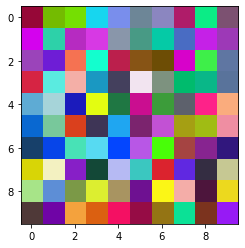

In [11]:
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt

plt.imshow(I.T)
plt.show()


Observe que 

In [12]:
(I.T).shape

(10, 10, 3)

Porque Python mnaneja las imagenes en este formato: Fila, columna y plano de color.

## Imagen real

Vamos a trabajar ahora con una imagen real.

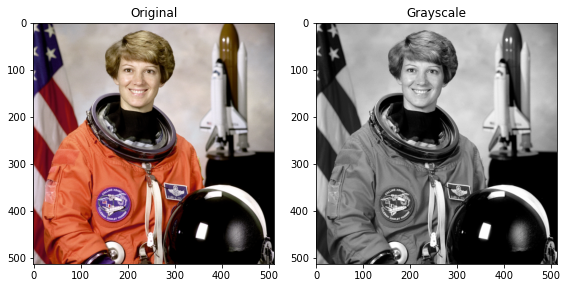

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# conda install -c anaconda scikit-image
from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [15]:
Idata=np.array(grayscale)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print(Idata)


La imagen tiene forma:  (512, 512) 

[[5.83434902e-01 4.14859216e-01 2.44058431e-01 ... 4.75007843e-01
  4.58213333e-01 4.69121961e-01]
 [6.75588235e-01 5.56006667e-01 4.49052941e-01 ... 4.68548627e-01
  4.56501176e-01 4.55958431e-01]
 [7.66334902e-01 7.00524314e-01 6.49276078e-01 ... 4.76406667e-01
  4.62104314e-01 4.53978431e-01]
 ...
 [6.81696471e-01 6.81979216e-01 6.71889020e-01 ... 0.00000000e+00
  2.82745098e-04 0.00000000e+00]
 [6.74694510e-01 6.68532941e-01 6.64030196e-01 ... 2.82745098e-04
  3.92156863e-03 0.00000000e+00]
 [6.70482353e-01 6.63189804e-01 6.52838824e-01 ... 0.00000000e+00
  3.92156863e-03 0.00000000e+00]]


## 

## Planos de color

In [16]:
Idata = np.array(original)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print("\nEscala de Rojos:\n\n",Idata[:511,:511,0],"\n")
print("\nEscala de Verdes:\n\n",Idata[:511,:511,1],"\n")
print("\nEscala de Azules:\n\n",Idata[:511,:511,2],"\n")


La imagen tiene forma:  (512, 512, 3) 


Escala de Rojos:

 [[154 109  63 ... 126 127 120]
 [177 144 113 ... 126 127 124]
 [201 182 168 ... 125 128 126]
 ...
 [186 188 184 ...   0   0   0]
 [186 186 183 ...   2   0   0]
 [183 182 185 ...  21   0   1]] 


Escala de Verdes:

 [[147 103  58 ... 120 120 117]
 [171 141 114 ... 118 118 115]
 [194 178 165 ... 119 120 116]
 ...
 [169 169 167 ...   0   0   0]
 [170 170 168 ...   2   0   0]
 [169 167 164 ...  21   0   1]] 


Escala de Azules:

 [[151 124 102 ... 114 115 106]
 [171 143 124 ... 111 112 108]
 [193 175 164 ... 113 117 112]
 ...
 [174 177 170 ...   0   0   1]
 [176 177 170 ...   3   0   1]
 [170 171 176 ...  16   1   1]] 



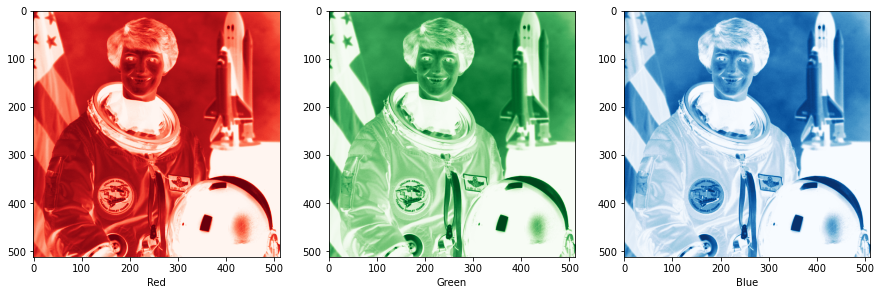

In [17]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))

ax1.imshow(Idata[:,:,0],cmap="Reds")
ax1.set_xlabel('Red')
ax2.imshow(Idata[:,:,1],cmap="Greens")
ax2.set_xlabel('Green')
ax3.imshow(Idata[:,:,2],cmap="Blues")
ax3.set_xlabel('Blue')
plt.show()

## Manipulación  de imágenes

### Intercambia dos planos de color

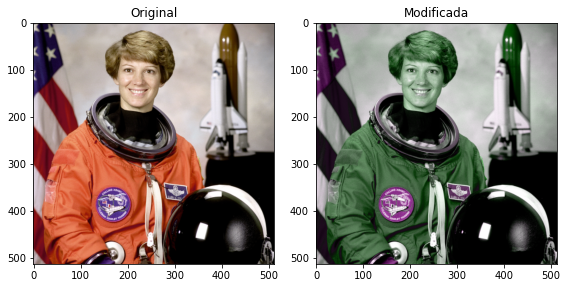

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()

Idata_m = Idata
Idata_m[:,:,0], Idata_m[:,:,2] = Idata_m[:,:,2], Idata_m[:,:,0]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(Idata_m)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

### suma un constante a la imagen

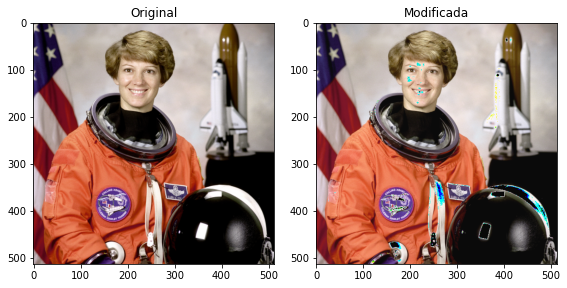

In [19]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

k = 10
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(original + k)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

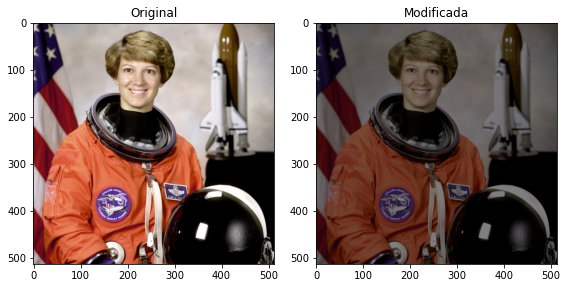

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

k = 2
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(original //k)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

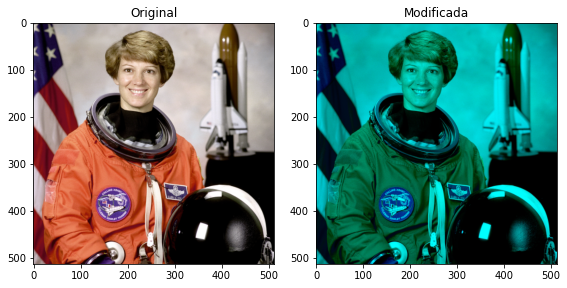

In [21]:
Idata_m = Idata

Idata_m[:,:,0 ]=0

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(Idata_m)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

In [22]:
Idata

array([[[  0, 147, 151],
        [  0, 103, 124],
        [  0,  58, 102],
        ...,
        [  0, 120, 115],
        [  0, 117, 106],
        [  0, 119, 110]],

       [[  0, 171, 171],
        [  0, 141, 143],
        [  0, 114, 124],
        ...,
        [  0, 118, 112],
        [  0, 115, 108],
        [  0, 116, 105]],

       [[  0, 194, 193],
        [  0, 178, 175],
        [  0, 165, 164],
        ...,
        [  0, 120, 117],
        [  0, 116, 112],
        [  0, 114, 109]],

       ...,

       [[  0, 170, 176],
        [  0, 170, 177],
        [  0, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[  0, 169, 170],
        [  0, 167, 171],
        [  0, 164, 176],
        ...,
        [  0,   0,   1],
        [  0,   1,   1],
        [  0,   0,   0]],

       [[  0, 167, 172],
        [  0, 165, 169],
        [  0, 162, 171],
        ...,
        [  0,   0,   0],
        [  0,   1,   1],
        [  0,   0,   0]]

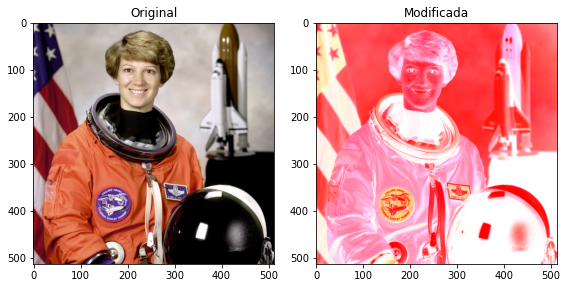

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(255 - Idata)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

## Colocar dos imagenes en un tensor

Esta es una forma para organizar conjuntos de imagenes en un único tensor

In [24]:
original= np.expand_dims(original,axis=0)

In [25]:
original.shape

(1, 512, 512, 3)

In [26]:
Idata_m= np.expand_dims(Idata_m,axis=0)

In [27]:
images = np.concatenate((original, Idata_m),axis=0)


In [28]:
images.shape

(2, 512, 512, 3)

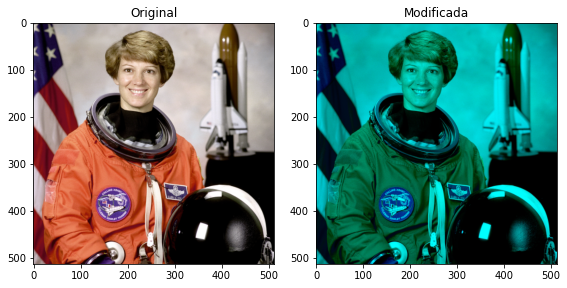

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(images[0])
ax[0].set_title("Original")
ax[1].imshow(images[1])
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

[Regresar al inicio](#Contenido)

## Trasformaciones afines

En este ejemplo usaremos la librería opencv.

Esta es la imagen original tomada de [omes-va.com](https://omes-va.com/trasladar-rotar-escalar-recortar-una-imagen-opencv/). Código tomado del mismo sitio.

In [30]:
import numpy as np
import cv2
image = cv2.imread('../Imagenes/ave.jpg')
cv2.imshow('Imagen de entrada',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Translación

$$
M =\begin{pmatrix} 1 & 0 & Tx\\
0 & 1 & Ty
\end{pmatrix}
$$

- Tx, representa el desplazamiento en x.

- Ty, representa el desplazamiento en y.



In [31]:
# Translación
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas
# Traslación
M = np.float32([[1,0,100],[0,1,150]])
imageOut = cv2.warpAffine(image,M,(ancho,alto))
cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotación 

$$
M =\begin{pmatrix} \cos \theta & -\sin \theta & 0\\
\cos \theta & \sin \theta & 1\\
0 & 0  & 1
\end{pmatrix}
$$

- $\theta$ representa el ángulo de rotación. En este ejemplo $\theta = \pi/4$ 0 lo que es lo mismo $45^o$.

In [32]:
# rotación
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas

M = cv2.getRotationMatrix2D((ancho//2,alto//2),15,1)
imageOut = cv2.warpAffine(image,M,(ancho,alto))
cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [33]:
image.shape

(426, 640, 3)